In [1]:
%matplotlib widget
import torch
import numpy as np
import matplotlib.pyplot
import torchvision.transforms as T
import torchvision.transforms.functional as F
import glob
import os
import PIL 
from PIL import Image
%load_ext autoreload
%autoreload 2

In [2]:
# import model
from model import Model_Composite_PL


In [3]:
def get_concat_h(im1, im2):
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    dst.paste(im1, (0, 0))
    dst.paste(im2, (im1.width, 0))
    return dst

In [4]:
Model = Model_Composite_PL(dim=32)

7
PLdim: 32


In [136]:
# Loading model
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220712_a10g_2_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio04_NewData_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0.4_device_3/checkpoints/ckpt16.pth"
# checkpoint_directory = "/home/kewang/sensei-fs-symlink/users/kewang/projects/PIH/PIH_ResNet/results/exp_20220713_a10g_6_unetD_7_no_skip_resnet_maskinput_pl32_l1ratio06_LR_pairaug_pure_batch_size_8_lr_1e-5_iharmony_compositegan_D_7_ratio_1_noskip_PL32_reconratio_0.6_device_2/checkpoints/ckpt40.pth"

device="cuda"
checkpoint = torch.load(checkpoint_directory, map_location=device)
Model.load_state_dict(checkpoint["state_dict"])

<All keys matched successfully>

In [137]:
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True
Model.to(device)
Model.eval()

Model_Composite_PL(
  (PL): ResNet(
    (conv1): Conv2d(7, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU()
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
 

In [138]:
transforms_mask = T.Compose([T.Grayscale(), T.ToTensor()])
transform = T.Compose([T.ToTensor()])
resize = T.Resize((512,512))

In [139]:
# Loading data
image_bg = resize(Image.open("Demo_hr/IMG_hr_02_bg.jpg"))
image_composite = resize(Image.open("Demo_hr/IMG_hr_02_composite.jpg"))
image_mask = resize(Image.open("Demo_hr/IMG_hr_02_mask.jpg"))


In [140]:
torch_bg = transform(image_bg).to(device)
torch_composite = transform(image_composite).to(device)
torch_mask = transforms_mask(image_mask).to(device)


In [141]:

scale = 1
translate = [0,0]

torch_composite = F.affine(
    torch_composite, angle=0, translate=[0, 0], scale=scale, shear=0
)
torch_mask = F.affine(
    torch_mask, angle=0, translate=[0, 0], scale=scale, shear=0
)


torch_composite = F.affine(
    torch_composite, angle=0, translate=translate, scale=1, shear=0
)
torch_mask = F.affine(
    torch_mask, angle=0, translate=translate, scale=1, shear=0
)

torch_composite = torch_composite*torch_mask +(1-torch_mask)*torch_bg


In [142]:
with torch.no_grad():
    inter_composite, output_composite, par1, par2 = Model(
                    torch_bg[None,...], torch_composite[None,...], torch_mask[None,...]                )

In [143]:
output_lr = T.ToPILImage()(output_composite[0,...])
composite_lr = T.ToPILImage()(torch_composite)


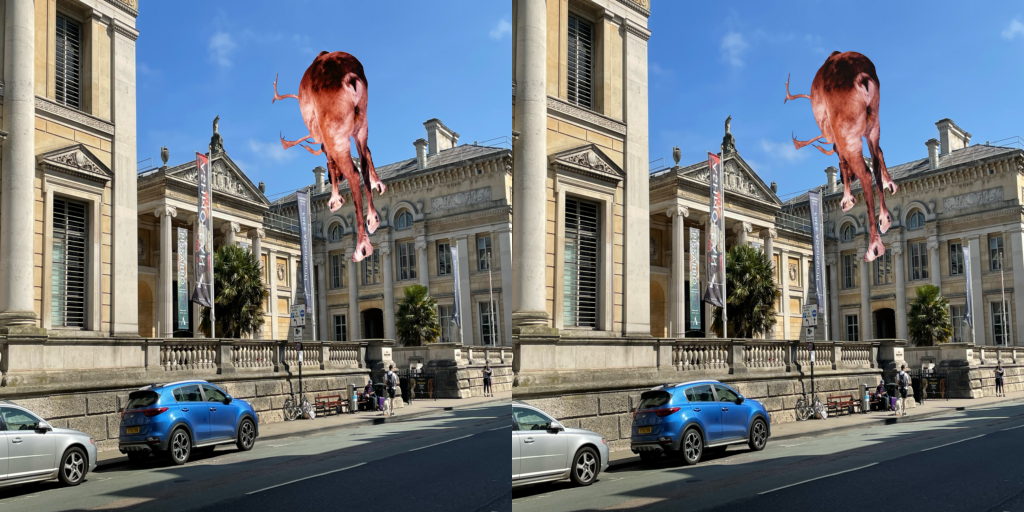

In [144]:
get_concat_h(composite_lr,output_lr)

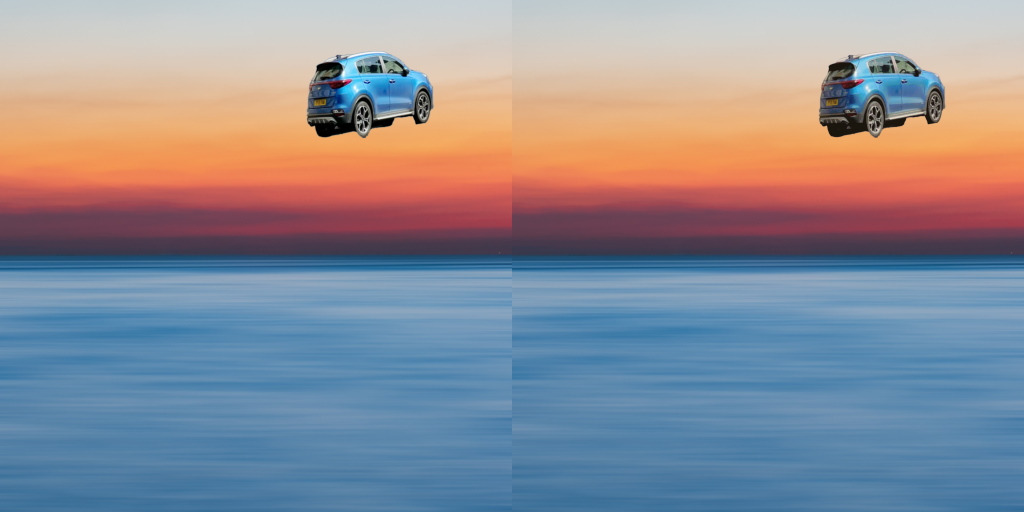

In [122]:
get_concat_h(composite_lr,output_lr)